#  Visualisation  for Python

      Joseph Salmon : joseph.salmon@umontpellier.fr

Adapté du travail de 

- A. Gramfort (alexandre.gramfort@inria.fr) http://alexandre.gramfort.net/
- J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

Remark: to run as slideshow with rise:
`jupyter nbconvert Visualization.ipynb --to slides --post serve`
following https://www.blog.pythonlibrary.org/2018/09/25/creating-presentations-with-jupyter-notebook/

In [1]:
%matplotlib notebook

**Remarque**: la commande "magique" `%matplotlib notebook` est aussi à privilégier pour pouvoir zoomer, sélectionner des sous zones, etc.  (à essayer donc!)  

Voir aussi:
- https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html
- https://ipython.org/ipython-doc/3/config/extensions/autoreload.html (pour `autoreload`)
- https://ipython.readthedocs.io/en/stable/interactive/magics.html

 * `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D
   * syntaxe très proche de celle de Matlab
   * supporte texte et étiquettes en $\LaTeX$
   * sortie de qualité dans divers formats (.png, .pdf, .svg, .gif,etc.)
   * interface graphique intéractive pour explorer les figures
 
* `guiqwt.pyplot` est une alternative intéressante qui reprend la syntaxe de `matplotlib` (plus récente, encore peu utilisée)

##  Imports

In [2]:
# Utile pour créer les slides du cours et avoir un affichage identique dans divers notebook, à laisser de côter par les élèves.
import os
import sys
sys.path.append("./codes")

In [20]:
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
from ipywidgets import interact, IntSlider, FloatLogSlider  # widget manipulation
import subprocess
from IPython.display import HTML
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'figure.max_open_warning': 0})
matplotlib.__version__

In [4]:
saving = True  # option pour sauvegarder les images

In [5]:
# Creations de tableau 1D avec valeurs numériques
x1 = np.linspace(0.0, 5.0, num=50)
x2 = np.linspace(0.0, 2.0, num=50)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

In [6]:
# commande "magique" pour améliorer la visualiation
%matplotlib inline
# %matplotlib notebook

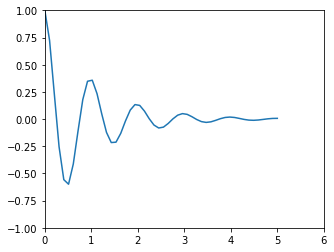

In [7]:
fig1 = plt.figure(figsize=(5, 4))
plt.plot(x1, y1)
plt.xlim(0,6)
plt.ylim(-1,1)
plt.show()  # Pour forcer l'affichage, notamment sans %matplolib inline

**ATTENTION, Mauvaise pratique!**

L'exemple ci-dessus est "léger" car il n'a pas de titre, de précision sur les axes, de légendes, etc.

## Export de fichiers images sous divers formats:

**Formats matriciels** (en anglais: bitmap):
- png (format brut, non compressé, s'ouvre avec <a href="https://www.gimp.org/">Gimp</a>)
- jpg (format compressé)

**Formats vectoriels**
- pdf (à privilégier dans vos documents)
- svg (facile à modifier avec  <a href="https://inkscape.org/fr/">Inkscape</a>)
- ps
- eps

### Formats matriciels
Format qui encode pixel par pixel une image

#### Format png:

In [8]:
# Export en png:
if saving:
    fig1.savefig("ma_figure_pas_belle.png", format='png', dpi=90)

**Remarque**: *dot per inch* (point par pouce) est l'unité de résolution voulue pour l'enregistrement (historiquement pour l'impression papier)

### Visualisation du png créé

In [9]:
import skimage  # Module pour la gestion des images
from skimage import io
skimage.__version__

'0.14.2'

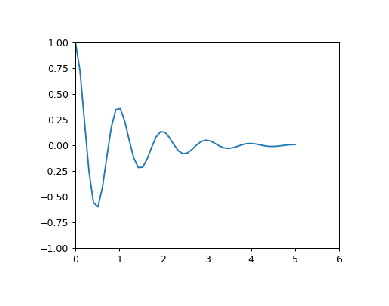

In [10]:
fig_png = plt.figure(figsize=(8, 5))
array_from_png = io.imread("ma_figure_pas_belle.png")
plt.imshow(array_from_png)
plt.axis('off')
plt.show()

In [11]:
print(array_from_png.shape) # noter que l'image couleur est un tenseur de dimension 3!
len('transparence')

(360, 450, 4)


12

**Interprétation**: l'image est représentée par un tenseur de dimension 3. L'image a 360 x 450 pixels.
Enfin l'encodage est le <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span>A, qui a 4 dimensions: 
- <span style="color:red">Red</span> : code le niveau de <span style="color:red">Rouge</span>
- <span style="color:green">Green</span> : code le niveau de <span style="color:green">Vert</span>
- <span style="color:blue">Blue</span> : code le niveau <span style="color:blue">Bleu</span>
- Alpha : code le niveau de <span style="opacity: 1">t</span><span style="opacity: 0.916">r</span><span style="opacity: 0.83">a</span><span style="opacity: 0.75">n</span><span style="opacity: 0.666">s</span><span style="opacity: 0.583">p</span><span style="opacity: 0.5">a</span><span style="opacity: 0.416">r</span><span style="opacity: 0.333">e</span><span style="opacity: 0.25">n</span><span style="opacity: 0.166">c</span><span style="opacity: 0.0833">e</span>.

#### Format jpg:

/home/jo/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


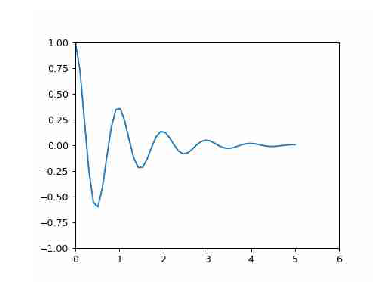

In [12]:
# Export en jpg basse qualité
if saving:
    io.imsave("ma_figure_pas_belle20.jpg",
              skimage.color.rgba2rgb(array_from_png), quality=20)
# Visualisation du jpg
array_from_jpeg = skimage.io.imread("ma_figure_pas_belle20.jpg")
plt.figure(figsize=(8, 5))
plt.imshow(array_from_jpeg)
plt.axis('off')
plt.show()

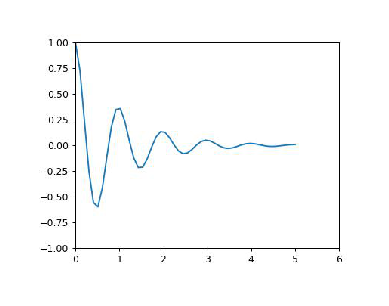

In [13]:
# Export en jpg qualité normale
if saving:
    io.imsave("ma_figure_pas_belle75.jpg",
              skimage.color.rgba2rgb(array_from_png), quality=75)  # 75 is default value, 100 best, 1 worst
array_from_jpeg = skimage.io.imread("ma_figure_pas_belle75.jpg")
plt.figure(figsize=(8, 5))
plt.imshow(array_from_jpeg)
plt.axis('off')
plt.show()

**ATTENTION**: donc aux formats jpeg et jpg:
ces formats sont avec perte, il sont à **proscrire** pour les rapports, comptes rendus, thèse, slides, etc.

### Format vectoriel:

Une image vectorielle est une image numérique composée d'objets géométriques individuels, des primitives géométriques (segments de droite, arcs de cercle, courbes de Bézier, polygones, etc.), définis chacun par différents attributs (forme, position, couleur, remplissage, visibilité, etc.).

Voir : https://fr.wikipedia.org/wiki/Image_vectorielle pour plus d'informations.

#### Format pdf: 
format le plus populaire pour inclure des graphiques dans des rapports, compte rendus, etc.

In [14]:
if saving:
    fig1.savefig("ma_figure_plus_belle.pdf",format='pdf', dpi=90)

In [15]:
from IPython.display import IFrame
IFrame("ma_figure_plus_belle.pdf", width=400, height=250)

#### Format svg:
c'est le format à privilégier pour inclure des graphiques si l'on compte faire de la "retouche" (par exemple rajouter des éléments trop compliqués à ajuster en ligne de code, en passant par exemple par <a href="https://inkscape.org/fr/">Inkscape</a>)

In [16]:
if saving:
    fig1.savefig("ma_figure_plus_belle.svg",format='svg')

## Améliorations visuelles

### Style
https://matplotlib.org/api/markers_api.html
{
"." : "point",
"," : "pixel",
"o" : "circle",
"v" : "triangle_down",
"^" : "triangle_up",
"<" : "triangle_left",
">" : "triangle_right",
"1" : "tri_down",
"2" : "tri_up",
"3" : "tri_left",
"4" : "tri_right",
"8" : "octagon",
"s" : "square",
"p" : "pentagon",
"*" : "star",
"h" : "hexagon1",
"H" : "hexagon2",
"+" : "plus",
"D" : "diamond",
"d" : "thin_diamond",
"|" : "vline",
"_" : "hline"
}


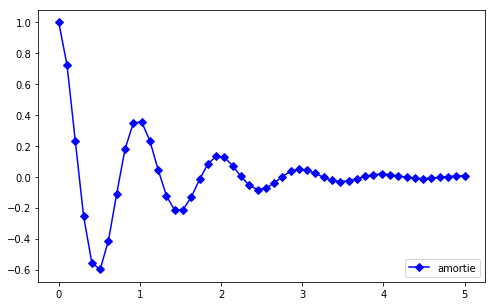

In [17]:
# Changer le le style en points ('o'), ligne ('-'), et couleur noire
fig1 = plt.figure(figsize=(8, 5))
plt.plot(x1, y1,'-D', color='b',label="amortie")
plt.legend(loc='lower right')
plt.show()

### Titre et noms des axes 

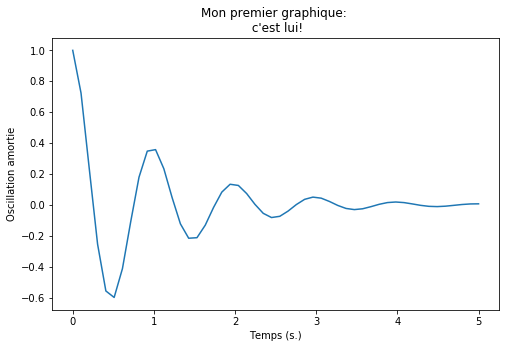

In [18]:
fig_jolie = plt.figure(figsize=(8, 5))
plt.plot(x1,y1)
plt.title("Mon premier graphique: \n c'est lui!")
plt.ylabel('Oscillation amortie')
plt.xlabel('Temps (s.)')
plt.show()
if saving:
    fig_jolie.savefig("ma_figure_jolie.pdf",format='pdf', dpi=90)

### Changer l'emplacement des axes

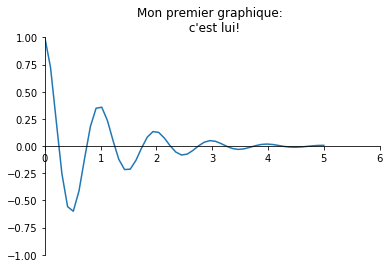

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.title("Mon premier graphique: \n c'est lui!")
plt.xlim(0, 6)
plt.ylim(-1, 1)
ax.plot(x1, y1)
# spine placement data centered
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

### Graphes et sous graphes

Text(0.5, 0, 'Temps (s.)')

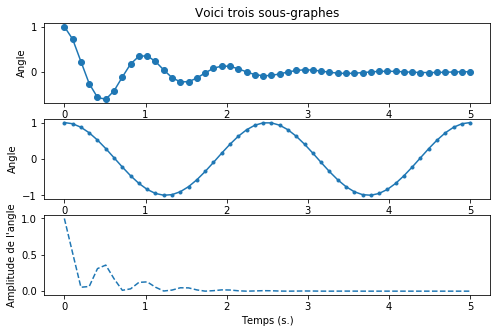

In [20]:
fig2 = plt.figure(figsize=(8, 5))
plt.subplot(3, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Voici trois sous-graphes')
plt.ylabel('Angle')

plt.subplot(3, 1, 2)
plt.plot(x1, y2, '.-')
plt.ylabel('Angle')

plt.subplot(3, 1, 3)
plt.plot(x1, y1**2, '--')
plt.ylabel("Amplitude de l'angle")
plt.xlabel('Temps (s.)')

Text(0.5, 0, 'Temps (s.)')

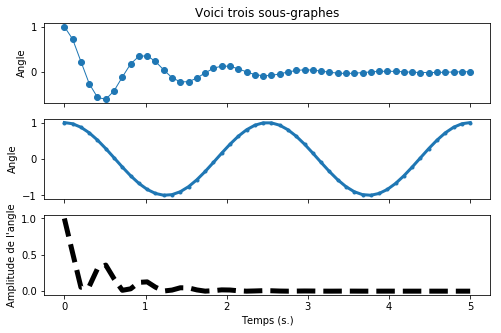

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(8,5),sharex=True)

axes[0].plot(x1, y1, 'o-',linewidth=1)
axes[0].set_title('Voici trois sous-graphes')
axes[0].set_ylabel('Angle')


axes[1].plot(x1, y2, '.-', linewidth=3)
axes[1].set_ylabel('Angle')

axes[2].plot(x1, y1**2, '--',color='black', linewidth=5)
axes[2].set_ylabel("Amplitude de l'angle")
axes[2].set_xlabel('Temps (s.)')

### Couleurs
https://matplotlib.org/api/colors_api.html

Liste de couleurs en Python: {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'},  

**Couleurs par défaut**:
Les couleurs par défauts sont gérées par ce qu'on appelle la **colormap** (carte de couleur).
Il en existe de nombreuses (cf. http://www.futurile.net/2016/03/31/colormaps-in-matplotlib/)

In [22]:
# Obtenir la colormap par défaut de Maptlotlib (viridis depuis la version 2)
cmap_name = plt.rcParams['image.cmap']
cmap = plt.cm.get_cmap(cmap_name)
print("La carte de couleur par défaut est : {}".format(cmap_name))

La carte de couleur par défaut est : viridis


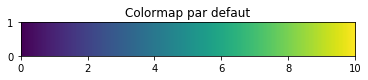

In [23]:
# Afficher la colormap par défaut
colors = cmap(np.arange(cmap.N))

fig = plt.figure(figsize=(6, 2))
plt.imshow([colors], extent=[0, 10, 0, 1])
plt.title("Colormap par defaut")
plt.show()

**Liste des colormaps** (palettes): 
https://matplotlib.org/tutorials/colors/colormaps.html

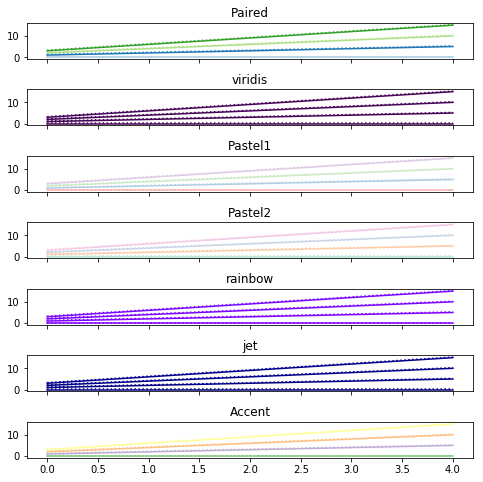

In [24]:
list_cmap = ['Paired', 'viridis',
             'Pastel1', 'Pastel2', 'rainbow', 'jet', 'Accent']
# list_cmap = ['coolwarm', 'Paired', 'viridis',
#              'Pastel1', 'Pastel2', 'rainbow', 'jet', 'Accent']
fig, axes = plt.subplots(len(list_cmap), 1, figsize=(8, 8), sharex=True)

for idx, cmap_name in enumerate(list_cmap):
    cmap = plt.get_cmap(cmap_name)
    t = np.arange(5)
    for i in range(4):
        axes[idx].plot(t, i * (t + 1),   color=cmap(i), linestyle='-')
        axes[idx].plot(t, i * (t + 1) + .3, color=cmap(i), linestyle=':')
        axes[idx].set_title(cmap_name)
fig.subplots_adjust(hspace=0.85)
plt.show()

<a id="visu"> </a>
# Divers types de visualisation

### Imshow
Affichage pour des matrices

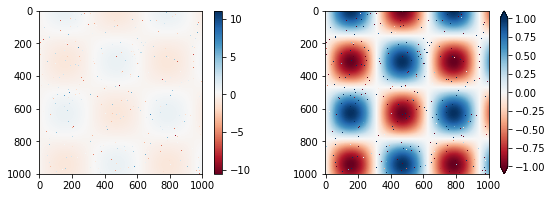

In [25]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(9.4, 3))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

**ATTENTION**: a suite nécessite l'installation des packages **seaborn** et **pandas**

In [27]:
from download import download

url = "http://josephsalmon.eu/enseignement/datasets/belgianmunicipalities.csv"
path_target = "./belgianmunicipalities.csv"
download(url, path_target, replace=False)


Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./belgianmunicipalities.csv'

In [28]:
cat belgianmunicipalities.csv

"","Commune","INS","Province","Arrondiss","Men04","Women04","Tot04","Men03","Women03","Tot03","Diffmen","Diffwom","DiffTOT","TaxableIncome","Totaltaxation","averageincome","medianincome"
"1","Aartselaar",11001,1,11,6971,7169,14140,7010,7243,14253,-39,-74,-113,242104077,74976114,33809,23901
"2","Anvers",11002,1,11,223677,233642,457319,221767,232405,454172,1910,1237,3147,5416418842,1423715652,22072,17226
"3","Boechout",11004,1,11,6027,5927,11954,6005,5942,11947,22,-15,7,167616996,50739035,29453,21613
"4","Boom",11005,1,11,7640,8066,15706,7535,7952,15487,105,114,219,186075961,46636930,21907,17537
"5","Borsbeek",11007,1,11,4948,5328,10276,4951,5322,10273,-3,6,3,143225590,40564374,26632,20739
"6","Brasschaat",11008,1,11,18142,18916,37058,18217,18903,37120,-75,13,-62,533368826,153629397,30574,21523
"7","Brecht",11009,1,11,12975,12976,25951,12863,12857,25720,112,119,231,325084836,86691504,25389,19833
"8","Edegem",11013,1,11,10614,11257,21871,10657,11298,21955,-43,-41,-84,337602904,102711766,3

In [29]:
df_belgium = pd.read_csv(path_target, index_col='Commune')
df_belgium = df_belgium.drop(['Unnamed: 0'],  axis=1)
df_belgium.head()

,INS,Province,Arrondiss,Men04,Women04,Tot04,Men03,Women03,Tot03,Diffmen,Diffwom,DiffTOT,TaxableIncome,Totaltaxation,averageincome,medianincome
Commune,,,,,,,,,,,,,,,,
Aartselaar,11001,1,11,6971,7169,14140,7010,7243,14253,-39,-74,-113,242104077,74976114,33809,23901
Anvers,11002,1,11,223677,233642,457319,221767,232405,454172,1910,1237,3147,5416418842,1423715652,22072,17226
Boechout,11004,1,11,6027,5927,11954,6005,5942,11947,22,-15,7,167616996,50739035,29453,21613
Boom,11005,1,11,7640,8066,15706,7535,7952,15487,105,114,219,186075961,46636930,21907,17537
Borsbeek,11007,1,11,4948,5328,10276,4951,5322,10273,-3,6,3,143225590,40564374,26632,20739


In [30]:
dictionnaire = {1: 'Anv.', 2: 'Brab.', 3: 'Fl.occ.',
                4: 'Fl.or.', 5: 'Hainaut', 6: 'Liège',
                7: 'Limb.', 8: 'Lux.', 9: 'Namur'}
df_belgium = df_belgium.replace({'Province': dictionnaire})
df_belgium.head()

,INS,Province,Arrondiss,Men04,Women04,Tot04,Men03,Women03,Tot03,Diffmen,Diffwom,DiffTOT,TaxableIncome,Totaltaxation,averageincome,medianincome
Commune,,,,,,,,,,,,,,,,
Aartselaar,11001,Anv.,11,6971,7169,14140,7010,7243,14253,-39,-74,-113,242104077,74976114,33809,23901
Anvers,11002,Anv.,11,223677,233642,457319,221767,232405,454172,1910,1237,3147,5416418842,1423715652,22072,17226
Boechout,11004,Anv.,11,6027,5927,11954,6005,5942,11947,22,-15,7,167616996,50739035,29453,21613
Boom,11005,Anv.,11,7640,8066,15706,7535,7952,15487,105,114,219,186075961,46636930,21907,17537
Borsbeek,11007,Anv.,11,4948,5328,10276,4951,5322,10273,-3,6,3,143225590,40564374,26632,20739


### Barplots
Afficher la moyenne ou la médiane par région.



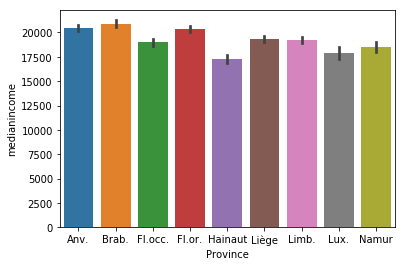

In [31]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df_belgium)

####  Échelle logarithmique sur l'axe des ordonnées

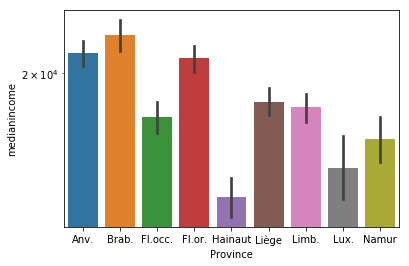

In [32]:
plt.figure()
fig_barplot = sns.barplot(x='Province', y='medianincome', data=df_belgium)
fig_barplot.set_yscale('log')


### Boxplots
Visualiser la médiane, les quantiles 1/4 et 3/4, 1.5 inter-quartiles et outliers?
voir e.g. : http://www.itse.be/statistique2010/co/233_Cours_boxplot.html

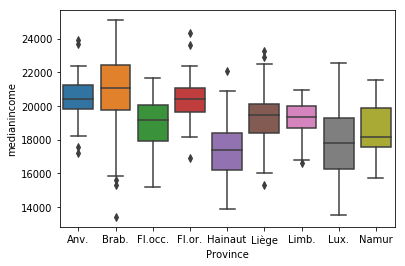

In [33]:
plt.figure()
fig_boxplot = sns.boxplot(x='Province', y='medianincome', data=df_belgium)

### Violons
https://datavizcatalogue.com/methods/violin_plot.html

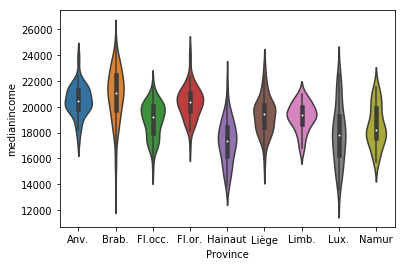

In [34]:
plt.figure()
sns.violinplot(x='Province', y='medianincome', data=df_belgium)

### Scatter plots (french: graphique de dispersion)
Corrélations entre la moyenne et la median des revenus

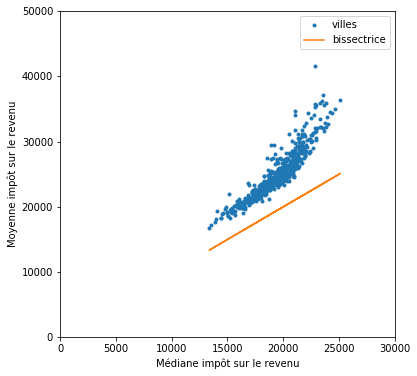

In [35]:
fig2 = plt.figure(figsize=(6, 6))
plt.plot(df_belgium['medianincome'],
         df_belgium['averageincome'], '.', label='villes')
plt.plot(df_belgium['medianincome'],
         df_belgium['medianincome'], label='bissectrice')
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000
plt.legend()

In [36]:
if saving:
    fig2.savefig("belgianmunicipalities.pdf", bbox_inches='tight')

**Remarque**: la moyenne tire toujours la richesse d'une ville vers le haut par rapport à la médiane (un seul foyer riche ne change pas la médiane, mais peut potentiellement changer la moyenne drastiquement).

#### Scatterplot avancé
Cette fois on va afficher les points par couleur selon la région pour observer à une granularité plus précise

(0, 50000)

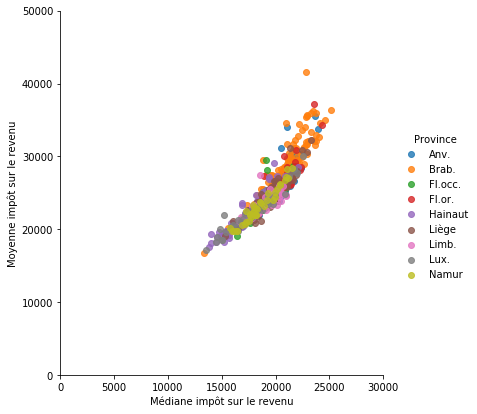

In [37]:
g = sns.lmplot(x='medianincome', y='averageincome',
           data=df_belgium, fit_reg=False, hue='Province')
g.fig.set_figheight(6)
g.fig.set_figwidth(7)
# plt.plot(df['medianincome'], df['medianincome'])
plt.xlabel('Médiane impôt sur le revenu')
plt.ylabel('Moyenne impôt sur le revenu')
plt.xlim((0, 30000))  # Démarre l'axe des x a 0 et fini a 30000
plt.ylim((0, 50000))  # Démarre l'axe des y a 0 et fini a 30000

In [38]:
if saving:
    g.savefig("belgianmunicipalities_clean.pdf", bbox_inches='tight')

### Fonction de densité
kde: est l'abbréviation de "Kernel Density Estimation" 

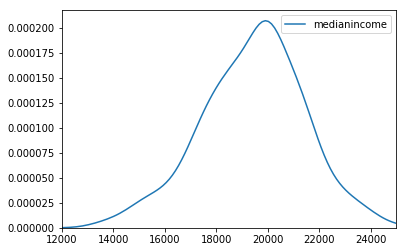

In [39]:
plt.figure()
plt.xlim(12000, 25000)
cdf_plot=sns.kdeplot(df_belgium['medianincome'], cumulative=False)

### Fonction de répartition (version lisse)

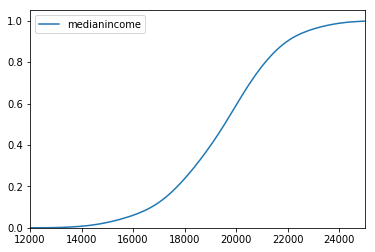

In [40]:
plt.figure()
plt.xlim(12000, 25000)
cdf_plot=sns.kdeplot(df_belgium['medianincome'], cumulative=True)

#### Fonction de répartition (version constante par morceaux)


Text(0.5, 1.0, 'Fonction de répartition empirique:\n revenus médians belges')

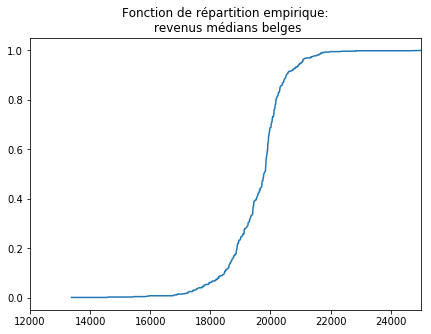

In [41]:
n_counts, bin_edges = np.histogram(
    df_belgium['medianincome'], bins=df_belgium['medianincome'].count())
cdf = np.cumsum(n_counts)  # cdf not normalized, despite above
scale = 1.0 / cdf[-1]
ncdf = scale * cdf
fig_cdf = plt.figure(figsize=(7, 5))
plt.plot(np.sort(df_belgium['medianincome']), ncdf)
plt.xlim(12000, 25000)
plt.title('Fonction de répartition empirique:\n revenus médians belges')

In [42]:
if saving:
    fig_cdf.savefig("belgianmunicipalities_median_cdf.pdf", bbox_inches='tight')

(12000, 25000)

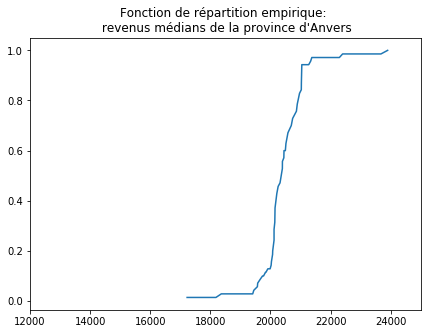

In [43]:
df_belgium_1 = df_belgium[df_belgium["Province"] == "Anv."]
n_counts, bin_edges = np.histogram(
    df_belgium_1['medianincome'], bins=df_belgium_1['medianincome'].count())
cdf = np.cumsum(n_counts)  # cdf not normalized, despite above
scale = 1.0 / cdf[-1]
ncdf = scale * cdf
fig_cdf_anv = plt.figure(figsize=(7, 5))
plt.plot(np.sort(df_belgium_1['medianincome']), ncdf)
plt.title(
    "Fonction de répartition empirique: \n revenus médians de la province d'Anvers")
plt.xlim(12000, 25000)

In [44]:
if saving:
    fig_cdf_anv.savefig("belgianmunicipalities_anvers_cdf.pdf", bbox_inches='tight')

## Display for graphs and maps

In [45]:
import networkx as nx

In [46]:
import osmnx as ox
ox.utils.config(use_cache=True) # caching large download 

In [47]:
G = ox.graph_from_place('Montpellier, France', network_type='bike')


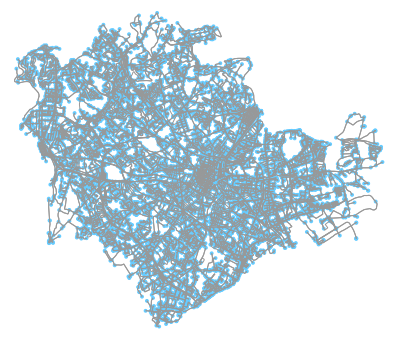

In [48]:
ox.plot_graph(G);

In [49]:
D = nx.incidence_matrix(G, oriented=False)


### Spy

(14830, 32989)
Edges Nodes:
32989 14830


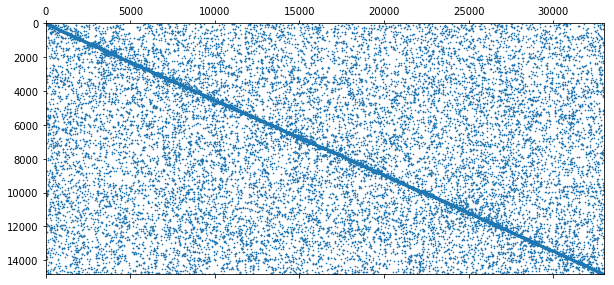

In [50]:
plt.figure(figsize=(10, 5))
plt.spy(D, markersize=0.6)
print(D.shape)
print('Edges','Nodes:')
print(G.number_of_edges(),G.number_of_nodes())

In [51]:
# https://blog.ouseful.info/2018/06/29/working-with-openstreetmap-roads-data-using-osmnx/
destination = ox.utils.geocode('Place Eugène Bataillon, Montpellier, France')
origin = ox.utils.geocode('Maison du Lez, Montpellier, France')

destination_node = ox.get_nearest_node(G, origin)
origin_node = ox.get_nearest_node(G, destination)

print(origin, origin_node)
print(destination, destination_node)
route = nx.shortest_path(G, origin_node, destination_node)  #XXX double check if weights are taken into account.
# ox.plot_graph_route(G, route)
print(route)

(43.61032245, 3.8966295) 31382654
(43.6309201, 3.8611052550025553) 267851583
[31382654, 289080551, 277712890, 277712888, 289080548, 289080549, 31382656, 1221843668, 1291093012, 31383278, 31327752, 31382664, 2392611862, 2394157179, 2394157176, 83738799, 2066991695, 2066991697, 1584018015, 248036778, 316624660, 248037486, 248036945, 248038444, 119290333, 129969707, 74926893, 20932621, 20932623, 128353646, 221769368, 221790765, 221788534, 2098812862, 2098812857, 2098812858, 2098812861, 221772080, 1583996911, 5158728485, 221809836, 622373017, 1583996889, 1117114246, 1117114279, 1117114353, 451006547, 1968231082, 1992311759, 1905837843, 1905837842, 1905690682, 250680620, 622316590, 290823856, 2392967921, 5414543471, 977654071, 977654216, 3956836078, 247209821, 5282743034, 6251450756, 250679440, 1433269396, 250677238, 1357901172, 6238445856, 267854089, 267851583]


In [52]:
import random
random.seed(44)

In [53]:
# Random walk in Montpellier:
def random_walk(G, start, n_iter=100):
    node = start
    path=[start]
    
    for i in range(n_iter):
        neighbors = [n for n in G.neighbors(node)]
        node = random.sample(neighbors,1)[0]        
        path.append(node)
    return path

## Removing cul de sac (nodes with in/out degrees <1)

In [54]:
def remove_cul_de_sac(G):
    print(G.number_of_nodes())
    to_remove_out = [node for node,degree in dict(G.out_degree()).items() if degree < 1]
    to_remove_in = [node for node,degree in dict(G.in_degree()).items() if degree < 1]
    G.remove_nodes_from(to_remove_in)
    print(G.number_of_nodes())
    G.remove_nodes_from(to_remove_out)
    print(G.number_of_nodes())

## Extracting a smaller part of the graph

In [55]:
local_G = ox.graph_from_point(origin, distance=800, distance_type='network', network_type='walk')
remove_cul_de_sac(local_G)
origin_node = ox.get_nearest_node(local_G, origin)

870
870
870


In [56]:
n_iter = 300
random_path = random_walk(local_G, origin_node, n_iter=n_iter)

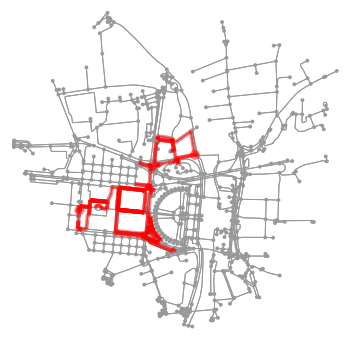

(<Figure size 614.685x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe14b2a0a20>)

In [57]:
ox.plot_graph_route(local_G, random_path)

# Animation (is hard...) don't use it :)

Some link to help you on that road.

- https://github.com/alisterburt/mpl_animation/blob/master/circle_oscillation/oscillating_circle.ipynb

- https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/

- https://stackoverflow.com/questions/20053964/animation-based-on-only-updating-colours-in-a-plot

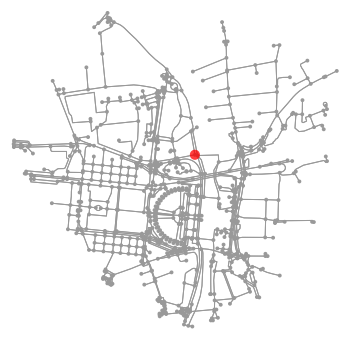

In [58]:
from matplotlib.collections import LineCollection

fig, ax = ox.plot_graph_route(local_G, [origin_node])

pic = ax.scatter(local_G.nodes[random_path[0]]['x'], local_G.nodes[random_path[0]]['y'], s=100,
               c='r', alpha=0.5, edgecolor='none', zorder=4)

lc = LineCollection([], colors='r', linewidths=4, alpha=0.2, zorder=3)
ax.add_collection(lc)

def animate(i):
    # inspired by code source of https://github.com/gboeing/osmnx/blob/master/osmnx/plot.py 
    pic.set_offsets([local_G.nodes[random_path[i+1]]['x'], local_G.nodes[random_path[i+1]]['y']])
    lines = ox.node_list_to_coordinate_lines(local_G, random_path[:i+1], True)
    lc.set_segments(lines)
    return pic, lc
    
# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, frames=n_iter-1, interval=100, blit=True, repeat=False)
plt.show()

In [59]:
HTML(ani.to_html5_video())  # Need ffmpeg installed on your machine

## Folium for nicer maps

In [60]:
# https://python-visualization.github.io/folium/quickstart.html
m = ox.plot_route_folium(local_G, random_path, route_width=2,route_opacity=0.5, route_color='#AA1111')  # adapté de : https://blog.ouseful.info/2018/06/29/working-with-openstreetmap-roads-data-using-osmnx/

In [61]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [62]:
# https://github.com/python-visualization/folium/issues/833
are_you_sure = False
if are_you_sure:
    import time
    import selenium.webdriver
    m = ox.plot_route_folium(
        local_G, random_path, route_width=2, route_color='#AA1111', fit_bounds=True)
    bounds = m.get_bounds()
    files = ''

    driver = selenium.webdriver.Firefox()

    for image_nb in range(n_iter):
        # inspired by code source of https://github.com/gboeing/osmnx/blob/master/osmnx/plot.py
        m = ox.plot_route_folium(
            local_G, random_path[:image_nb+2], route_width=2, route_opacity=0.5, route_color='#AA1111')
        m.fit_bounds(bounds)
        # call the animator.  blit=True means only re-draw the parts that have changed.
        filename = 'fig_folium' + str(image_nb)
        if saving is True:
            fn = "./gifs/folium_%s.html" % str(image_nb).zfill(3)
            m.save(fn)
            files = files + ' gifs/folium_{}.png'.format(str(image_nb).zfill(3))
            driver.set_window_size(1000, 1000)  # choose a resolution
            driver.get(
                'file:///home/jo/Documents/Mes_cours/Montpellier/HMMA238_public/HMMA238/Visualization/'+fn)
            # You may need to add time.sleep(seconds) here
            time.sleep(1.5)
            driver.save_screenshot("gifs/folium_%s.png" % str(image_nb).zfill(3))

            print(files)

            command = 'convert -delay 5 {} -loop 100 gifs/folium.gif'.format(
                ' '.join(files))
            plt.close('all')

 gifs/folium_000.png
 gifs/folium_000.png gifs/folium_001.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/foliu

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.pn

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png
 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.pn

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

 gifs/folium_000.png gifs/folium_001.png gifs/folium_002.png gifs/folium_003.png gifs/folium_004.png gifs/folium_005.png gifs/folium_006.png gifs/folium_007.png gifs/folium_008.png gifs/folium_009.png gifs/folium_010.png gifs/folium_011.png gifs/folium_012.png gifs/folium_013.png gifs/folium_014.png gifs/folium_015.png gifs/folium_016.png gifs/folium_017.png gifs/folium_018.png gifs/folium_019.png gifs/folium_020.png gifs/folium_021.png gifs/folium_022.png gifs/folium_023.png gifs/folium_024.png gifs/folium_025.png gifs/folium_026.png gifs/folium_027.png gifs/folium_028.png gifs/folium_029.png gifs/folium_030.png gifs/folium_031.png gifs/folium_032.png gifs/folium_033.png gifs/folium_034.png gifs/folium_035.png gifs/folium_036.png gifs/folium_037.png gifs/folium_038.png gifs/folium_039.png gifs/folium_040.png gifs/folium_041.png gifs/folium_042.png gifs/folium_043.png gifs/folium_044.png gifs/folium_045.png gifs/folium_046.png gifs/folium_047.png gifs/folium_048.png gifs/folium_049.png

In [63]:
# Batch treatment to avoid too big files
if are_you_sure:
    subprocess.run('''
    cd  gifs
    files=(*.png )

    batch=75

    ## Read the array in batches of $batch
    for (( i=0; $i<${#files[@]}; i+=$batch ))
    do
        ## Convert this batch
        convert -limit memory 1GB -limit map 4GB -define registry:temporary-path=/tmp -layers optimize -resize 800 -delay 1 {} -loop 1 "${files[@]:$i:$batch}" animated.$i.gif
    done
    cd ..
    ''', shell=True, check=True, executable='/bin/bash')

CompletedProcess(args='\ncd  gifs\nfiles=(*.png )\n\nbatch=75\n\n## Read the array in batches of $batch\nfor (( i=0; $i<${#files[@]}; i+=$batch ))\ndo\n    ## Convert this batch\n    convert -limit memory 1GB -limit map 4GB -define registry:temporary-path=/tmp -layers optimize -resize 800 -delay 1 {} -loop 1 "${files[@]:$i:$batch}" animated.$i.gif\ndone\ncd ..\n', returncode=0)

In [64]:
if are_you_sure:
    # Merging large videos:
    subprocess.run('''
    cd gifs
    ## Now, merge them into a single file
    convert -loop 0 animated.0.gif animated.75.gif animated.150.gif animated.225.gif all.gif
    cd ..
    ''', shell=True, check=True, executable='/bin/bash')


CompletedProcess(args='\ncd gifs\n## Now, merge them into a single file\nconvert -loop 0 animated.0.gif animated.75.gif animated.150.gif animated.225.gif all.gif\ncd ..\n', returncode=0)

### <font color='red'> TODO : Add widgets examples </font>


In [21]:
# saving tools for the course:
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True, # possibly set False if no Latex install on your machine
          'figure.figsize': (10, 7),
          'font.family' : 'sans-serif'}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

dirname = "../prebuiltimages/"
imageformat = ".pdf"

In [28]:
# Random samples:


def simulated_IC(n_samples=100, beta_0=3, beta_1=2, sigma=15, alpha=0.05):


    np.random.seed(44)

    X_to_predict = pd.DataFrame(np.linspace(0.0, 50.0, num=50).reshape(50, 1))
    X_to_predict.columns=['X']

    X = 50 * np.random.rand(n_samples, 1)
    y = X * beta_1 + beta_0 + sigma * np.random.randn(n_samples, 1)

    df_simulated = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
    df_simulated.columns = ['X', 'y']
    
    fig = plt.figure(figsize=(10, 7))

    results = smf.ols('y ~ X', data=df_simulated).fit()

    predictions = results.get_prediction(X_to_predict)
    df_predictions = predictions.summary_frame(alpha=alpha)
    IC_down = df_predictions['mean_ci_lower'].astype(float)
    IC_up = df_predictions['mean_ci_upper'].astype(float)

    plt.plot(X_to_predict, IC_down, '--', color='k',  linewidth=1,
             label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
    plt.plot(X_to_predict, IC_up, '--', color='k', linewidth=1, label='')

    plt.plot(df_simulated['X'], df_simulated['y'], 'o',
             label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)

    plt.plot(X_to_predict, results.predict(X_to_predict),
             linewidth=3, color=my_orange, label=r"Moindres carr\'es")
    ax = plt.gca()

    ax.fill_between(X_to_predict.squeeze(),
                    IC_up.astype(float),
                    IC_down.astype(float), facecolor='blue', alpha=.2)

    plt.xlim(left=0, right=50)
    plt.ylim(bottom=-20, top=130)

    plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
    plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
    plt.tight_layout()
    plt.show()

In [29]:
interact(simulated_IC,
         n_samples=IntSlider(min=5, max=200, step=5, value=100),
         beta_0=(0.1, 5, 0.1),
         beta_1=(0.1, 5, 0.1),
         sigma=(0.5, 20, 0.5),
         alpha=FloatLogSlider(value=0.0001, description='Log Slider', max=-1, min=-10.0, step=0.2)
         )

interactive(children=(IntSlider(value=100, description='n_samples', max=200, min=5, step=5), FloatSlider(value…

<function __main__.simulated_IC(n_samples=100, beta_0=3, beta_1=2, sigma=15, alpha=0.05)>